Plot the speed and size, but varying alpha

In [10]:
import spatialfunctions as sf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [11]:
plt.rcParams['font.family'] = 'serif'

# Make plot colors and things to make it easier to be consistent
cmap = plt.cm.get_cmap('Greens')
cdiscrete = cmap(np.linspace(0, 1, 10))
c0 = 'k'
c1 = cdiscrete[-1]
c2 = cdiscrete[-3]
c3 = cdiscrete[-5]
clist = [c1,c2,c3]

# Figsize consistent
figsize = (3,3)

In [12]:
# Set params
s = 0.99
N = 60
c = 1300

# Do a reasonable range of alpha
allist= [0.001,0.01,0.1]

# Use a range of thresholds
plist = np.arange(100,625,25)
plen = len(plist)

# Set up grid to be large enough given the dispersal kernel
xrexplist = [19,17,14]; dx=16;
#xr = np.arange(-2**xrexp,2**xrexp+dx,step=dx)

In [13]:
# Simulate for this many steps
nt = 200

# Save metrics
metrics = np.zeros([3,3,plen])

for j,al in enumerate(allist):
    xr = np.arange(-2**xrexplist[j],2**xrexplist[j]+dx,step=dx)
    for i,pp in enumerate(plist):
        # Simple progress bar
        clear_output(wait=True)
        print(i+1,"/",plen)
        # Get metrics speed[i],period[i],size[i]
        metrics.T[i,j] = sf.get_outbreak_metrics(pp,c,s,N,al,xr,xrexplist[j],dx,nt)

21 / 21


In [14]:
# Make sure period is N+3 or 0
for j,al in enumerate(allist):
    print(np.bitwise_or(metrics[1,j]==N+3,metrics[1,j]==0))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True]


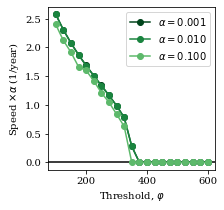

In [15]:
# Plot speeds
plt.figure(figsize=figsize)
for j,al in enumerate(allist):
    plt.plot(plist,metrics[0,j]*al,'o-',c=clist[j],label=r'$\alpha={:.3f}$'.format(al))
plt.axhline(0,c=c0,zorder=-99)
plt.legend()
plt.xlabel(r'Threshold, $\varphi$')
plt.ylabel(r'Speed $\times \alpha$ (1/year)')
plt.savefig('figures/speed_varyal.pdf',bbox_inches='tight')

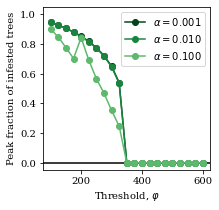

In [16]:
# Plot sizes
plt.figure(figsize=figsize)
for j,al in enumerate(allist):
    plt.plot(plist,metrics[2,j],'o-',c=clist[j],label=r'$\alpha={:.3f}$'.format(al))
plt.axhline(0,c=c0,zorder=-99)
ydefault = plt.gca().get_ylim()
plt.ylim(ydefault[0],1.05)
plt.legend()
plt.xlabel(r'Threshold, $\varphi$')
plt.ylabel('Peak fraction of infested trees')
plt.savefig('figures/size_varyal.pdf',bbox_inches='tight')